# Projet P5 - IMDB

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
# Import des modules et librairies
%matplotlib inline
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploration des données

In [37]:
#Affichages de toutes les colonnes
pd.set_option("display.max_columns", None)
# Chargement des données
df = pd.read_csv("./Datas/5000_movies_bis.csv")
df.head(3)

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_fb_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


#### *Composition détaillée du Dataset* : 
##### *IMDB : Internet Movie Database*
- __color__ : Si le film est en N&B / Couleur
- __director_name__ : Nom du réalisateur du film
- __num_critic_for_reviews__ : Nbr de critiques
- __duration__ : Durée du film (min)
- __director_fb_likes__ : Nbr de "likes" sur la page FB du réalisateur
- __actor_3_fb_likes__ : Nbr de "likes" de l'acteur sur sa page FB
- __actor_2_name__ : Nom de l'acteur secondaire
- __actor_1_fb_likes__ : Nbr de "likes" de l'acteur principal sur sa page FB
- __gross__ : Recettes brutes du film (en dollars)
- __genres__ : Catégories du film (Comédie, Romance, Horreur, Science-Fiction, etc.)
- __actor_1_name__ : Nom de l'acteur principal
- __movie_title__ : Titre du film
- __num_voted_users__ : Nbr de personnes ayant voté
- __cast_total_fb_likes__ : Nbr total de likes FB (Casting complet)
- __actor_3_name__ : Nom de l'acteur (3)
- __facenumber_in_poster__ : Nbr de figurants sur l'affiche du film
- __plot_keywords__ : Mots clés décrivant l'intrigue du film
- __movie_imdb_link__ : Lien IMDB du film
- __num_user_for_reviews__ : Nbr d'utilisateurs ayant donné une note
- __language__ : Langue du film
- __country__ : Pays où le film est produit
- __content_rating__ : Evaluation du contenu du film
- __budget__ : Budget du film (en dollars)
- __title_year__ : Année de sortie du film
- __actor_2_fb_likes__ : Nbr de "likes" de l'acteur secondaire sur sa page FB
- __imbd_score__ : Score IMBD du film 
- __aspect_ratio__ : Ratio (format image)
- __movie_fb_likes__ : Nbr de "likes" sur la page FB du film

In [ ]:
#Possibilité de générer un rapport détaillé du dataset au format html
profile = ProfileReport(df, title="Profiling Report - IMBD Dataset")
profile.to_file("IMDB_dataset_report.html")

In [39]:
# Dimensions du dataset
df.shape

(5043, 28)

In [40]:
# Première analyse avec info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   5024 non-null   object 
 1   director_name           4939 non-null   object 
 2   num_critic_for_reviews  4993 non-null   float64
 3   duration                5028 non-null   float64
 4   director_fb_likes       4939 non-null   float64
 5   actor_3_fb_likes        5020 non-null   float64
 6   actor_2_name            5030 non-null   object 
 7   actor_1_fb_likes        5036 non-null   float64
 8   gross                   4366 non-null   float64
 9   genres                  5043 non-null   object 
 10  actor_1_name            5036 non-null   object 
 11  movie_title             5043 non-null   object 
 12  num_voted_users         5043 non-null   int64  
 13  cast_total_fb_likes     5043 non-null   int64  
 14  actor_3_name            5020 non-null   

In [41]:
df.describe()

,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_1_fb_likes,gross,num_voted_users,cast_total_fb_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.366000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.637000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.672094e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.938928e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.736555e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.042473e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,4.587414e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.400416e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,5.954872e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.300000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


Nous voyons que le dataset contient 2 grands types de données :
- des données numériques : num_critic_for_reviews, duration, director_facebook_likes, actors facebook likes, gross, num_voted_users, cast_total_facebook_likes, facenumber_in_poster, num_user_for_reviews, budget, title_year, imdb_score, etc...
- des données catégorielles : color, director name, actors name, genres, titre, langue, pays...

Notre variable à expliquer (prédire) est : **imdb_score**

### Analyse de la colonne movie_imdb_link

In [42]:
# Que contient-elle ?
df["movie_imdb_link"]

0       http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1       http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2       http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3       http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4       http://www.imdb.com/title/tt5289954/?ref_=fn_t...
                              ...                        
5038    http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039    http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040    http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041    http://www.imdb.com/title/tt2070597/?ref_=fn_t...
5042    http://www.imdb.com/title/tt0378407/?ref_=fn_t...
Name: movie_imdb_link, Length: 5043, dtype: object

In [43]:
# Cette variable n'est pas explicative, on la supprime
df.drop('movie_imdb_link', axis=1, inplace=True)
df.shape

(5043, 27)

### Analyse de la colonne color

In [44]:
# Répartition des valeurs
df["color"].value_counts()

color
Color               4815
 Black and White     209
Name: count, dtype: int64

In [45]:
# La très grande majorité des films sont en couleur, cette variable ne sera pas explicative, on la supprime
df.drop('color', axis=1, inplace=True)
df.shape

(5043, 26)

### Analyse de la colonne language

In [46]:
# Répartition des valeurs
df["language"].value_counts()

language
English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           8
Danish           5
Arabic           5
Hebrew           5
Swedish          5
Polish           4
Norwegian        4
Persian          4
Dutch            4
Chinese          3
Thai             3
Icelandic        2
Aboriginal       2
Indonesian       2
Zulu             2
Romanian         2
Dari             2
Panjabi          1
Vietnamese       1
Slovenian        1
Greek            1
Dzongkha         1
Tamil            1
Urdu             1
Telugu           1
Kannada          1
Czech            1
Hungarian        1
Bosnian          1
Filipino         1
Mongolian        1
Maya             1
Aramaic          1
Kazakh           1
Swahili          1
Name: count, dtype: int64

In [47]:
# La très grande majorité des films sont en anglais, cette variable ne sera pas explicative, on la supprime
df.drop('language', axis=1, inplace=True)
df.shape

(5043, 25)

### Analyse de la colonne country

In [48]:
# Répartition des valeurs
df["country"].value_counts()

country
USA              3807
UK                448
France            154
Canada            126
Germany            97
                 ... 
Slovakia            1
Chile               1
Cambodia            1
Official site       1
Philippines         1
Name: count, Length: 65, dtype: int64

In [49]:
# Nous pouvons raisonnablement réorganiser cette colonne en 3 valeurs distinctes : USA, UK, et Other
df["country"] = df["country"].where(df["country"].isin(["USA", "UK"]), "Other")
df["country"]

0         USA
1         USA
2          UK
3         USA
4       Other
        ...  
5038    Other
5039      USA
5040      USA
5041      USA
5042      USA
Name: country, Length: 5043, dtype: object

### Analyse des valeurs manquantes

In [50]:
# Y'en a-t-il ?
df.isna().any()

director_name              True
num_critic_for_reviews     True
duration                   True
director_fb_likes          True
actor_3_fb_likes           True
actor_2_name               True
actor_1_fb_likes           True
gross                      True
genres                    False
actor_1_name               True
movie_title               False
num_voted_users           False
cast_total_fb_likes       False
actor_3_name               True
facenumber_in_poster       True
plot_keywords              True
num_user_for_reviews       True
country                   False
content_rating             True
budget                     True
title_year                 True
actor_2_fb_likes           True
imdb_score                False
aspect_ratio               True
movie_fb_likes            False
dtype: bool

In [51]:
### Combien ?
df.isna().sum()

director_name             104
num_critic_for_reviews     50
duration                   15
director_fb_likes         104
actor_3_fb_likes           23
actor_2_name               13
actor_1_fb_likes            7
gross                     677
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
cast_total_fb_likes         0
actor_3_name               23
facenumber_in_poster       13
plot_keywords             153
num_user_for_reviews       21
country                     0
content_rating            303
budget                    406
title_year                108
actor_2_fb_likes           13
imdb_score                  0
aspect_ratio              329
movie_fb_likes              0
dtype: int64

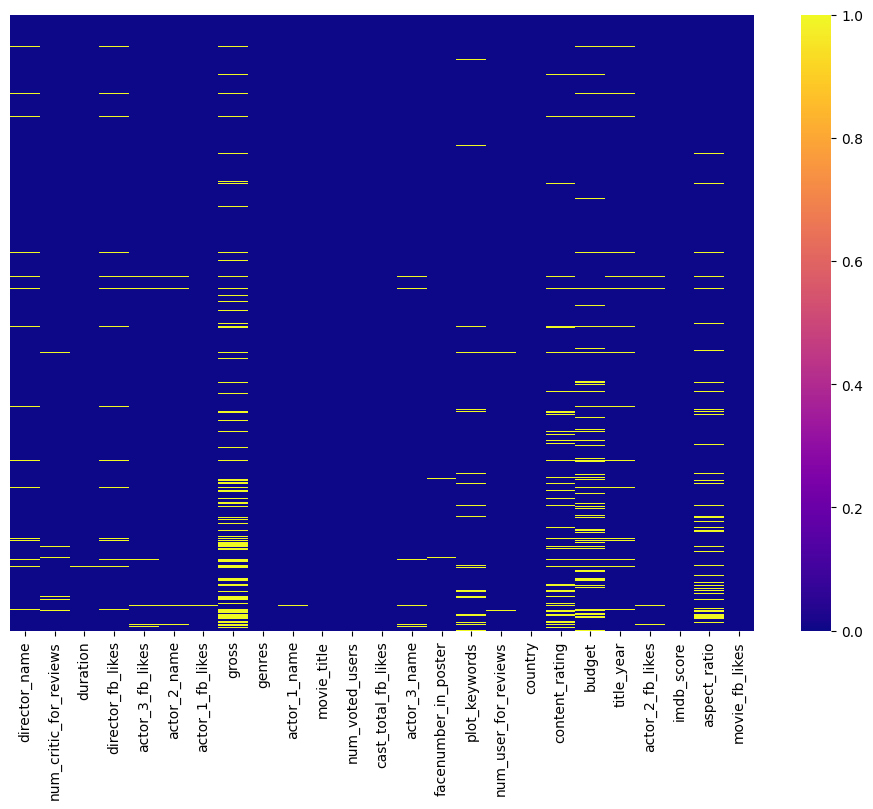

In [52]:
# Visualisation
plt.figure(figsize = (12,8))
sns.heatmap(df.isna(), yticklabels=False, cbar=True, cmap='plasma');

In [53]:
# Beaucoup de colonnes ont peu de valeurs manquantes, on peut se permettre de les enleverver sans pour autant perdre beaucoup d'information
# Nous prenons la décision d'enlever les valeurs manquantes dans les colonnes qui en comptent moins de 5%, soit environ 250 valeurs
columns_to_clean = ['director_name', 'num_critic_for_reviews', 'duration', 'director_fb_likes', 'actor_3_fb_likes', 'actor_2_name', 'actor_1_fb_likes',
                    'actor_1_name', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'num_user_for_reviews', 'country', 'title_year',
                    'actor_2_fb_likes']
df.dropna(axis = 0, subset = columns_to_clean, inplace = True)
df.shape

(4745, 25)

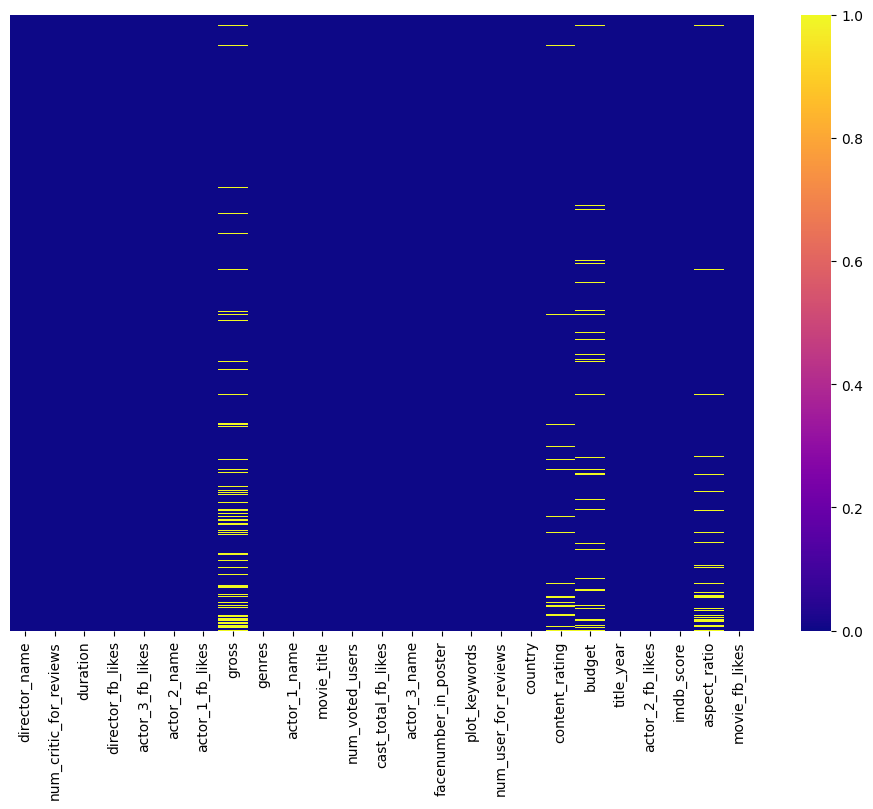

In [54]:
# Visualisation #2
plt.figure(figsize = (12,8))
sns.heatmap(df.isna(), yticklabels=False, cbar=True, cmap='plasma');

Gestion des valeurs manquantes de la colonne **gross**

In [55]:
# Distribution des valeurs
df["gross"].describe()

count    4.285000e+03
mean     4.738806e+07
std      6.761460e+07
min      1.620000e+02
25%      5.023275e+06
50%      2.484829e+07
75%      6.005764e+07
max      7.605058e+08
Name: gross, dtype: float64

In [56]:
# Nous faisons le choix de remplacer les valeurs manquantes par la valeur médiane de la distribution,
# pour ne pas influer négativement sur le résultat du futur modèle
df["gross"].fillna(df["gross"].median(), inplace=True)

Gestion des valeurs manquantes de la colonne **content_rating**

In [57]:
# Analyse des valeurs
df["content_rating"].value_counts()

content_rating
R            2083
PG-13        1436
PG            683
G             109
Not Rated     102
Unrated        58
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-14           3
TV-G            3
TV-PG           1
Name: count, dtype: int64

In [58]:
# Nous faisons le choix de remplacer les valeurs manquantes par la valeur la plus représentée
df["content_rating"].fillna("R", inplace=True)

Gestion des valeurs manquantes de la colonne **budget**

In [59]:
# Distribution des valeurs
df["budget"].describe(), df["budget"].median()

(count    4.474000e+03
 mean     4.047844e+07
 std      2.077930e+08
 min      2.180000e+02
 25%      7.000000e+06
 50%      2.000000e+07
 75%      4.500000e+07
 max      1.221550e+10
 Name: budget, dtype: float64,
 20000000.0)

In [60]:
# Même choix que pour la colonne gross
df["budget"].fillna(df["budget"].median(), inplace=True)

Gestion des valeurs manquantes de la colonne **aspect_ratio**

In [61]:
# Distribution des valeurs
df["aspect_ratio"].describe(), df["aspect_ratio"].median()

(count    4534.000000
 mean        2.115240
 std         0.648723
 min         1.180000
 25%         1.850000
 50%         2.350000
 75%         2.350000
 max        16.000000
 Name: aspect_ratio, dtype: float64,
 2.35)

In [62]:
# Même choix que pour la colonne gross
df["aspect_ratio"].fillna(df["aspect_ratio"].median(), inplace=True)

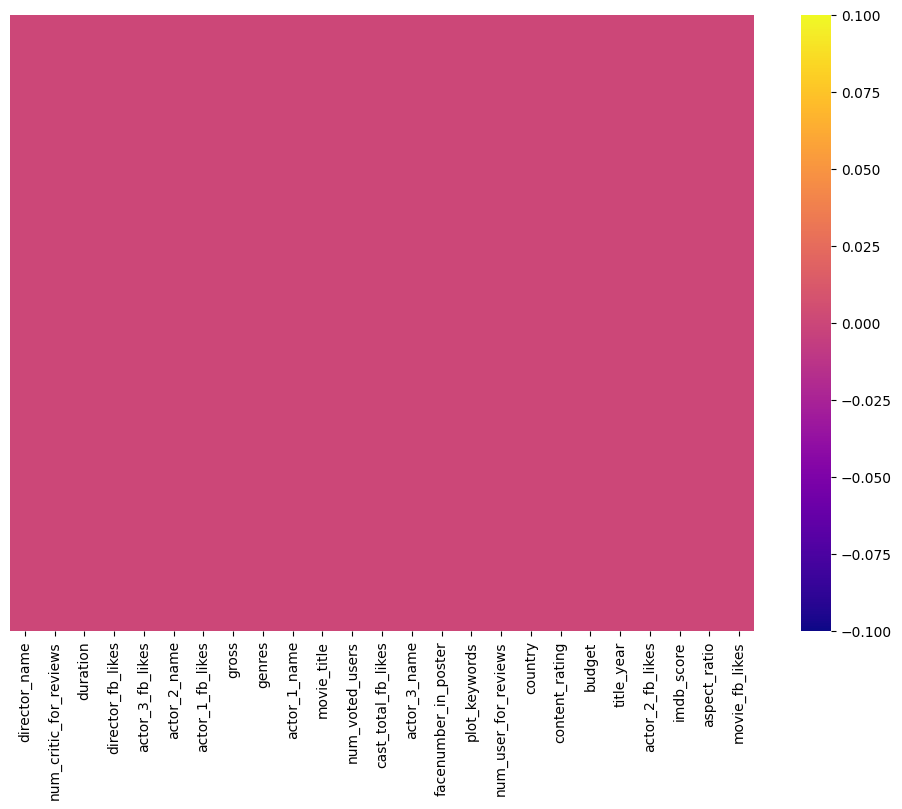

In [63]:
# Visualisation #3 pour valider que nous n'avons plus de valeur manquante dans les données
plt.figure(figsize = (12,8))
sns.heatmap(df.isna(), yticklabels=False, cbar=True, cmap='plasma');

### Valeurs doublons ?

In [64]:
df.loc[df.duplicated()].shape

(42, 25)

In [65]:
# Après nettoyage, 42 entrées sont des doublons. On les supprime
df.drop_duplicates(inplace=True)
df.shape

(4703, 25)

### Deuxième rapport ydata, après nettoyage

In [32]:
profile = ProfileReport(df, title="Profiling Report - IMBD Clean Dataset")
profile.to_file("IMDB_clean_dataset_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Corrélations entre variables

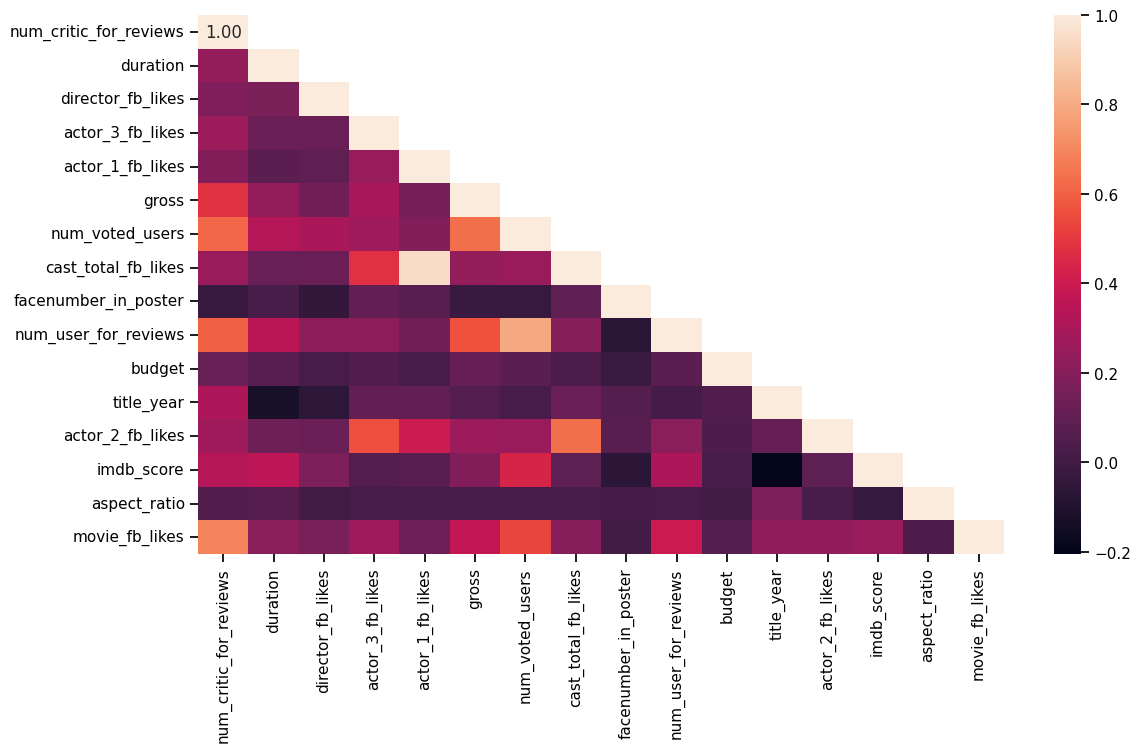

In [72]:
# Matrice de corrélation globale
corr = df.corr(numeric_only=True)
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# Création d'un masque pour masquer les valeurs apparaissant 2 fois
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
plt.show()

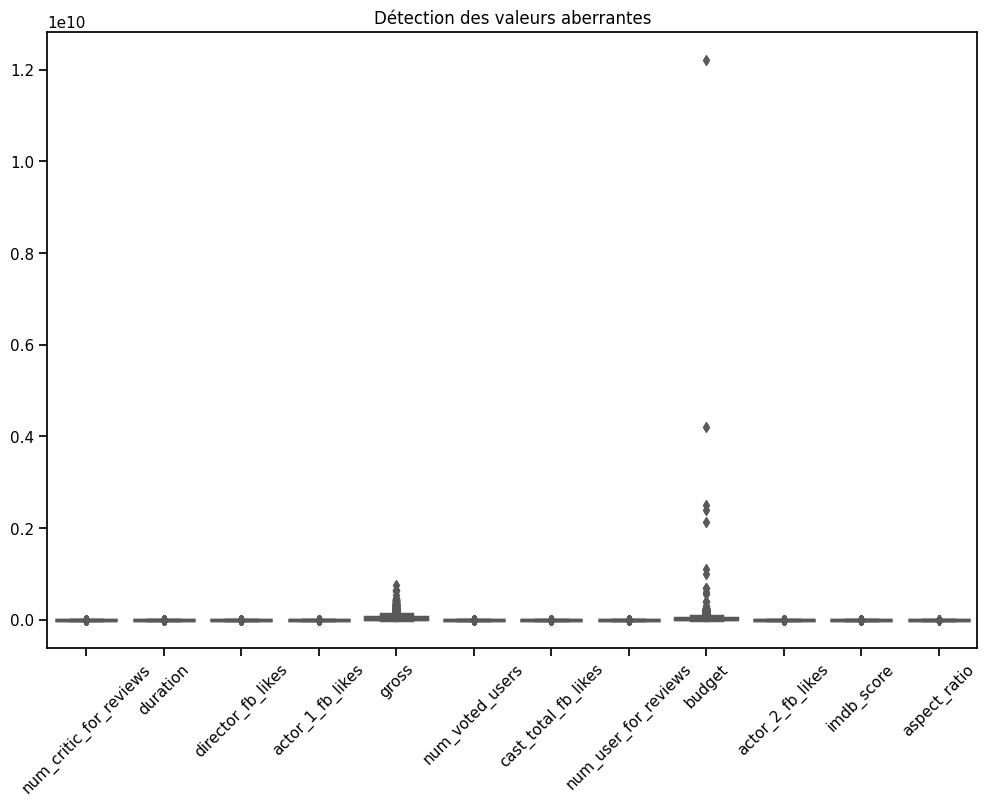

In [74]:
columns_to_plot = ['num_critic_for_reviews', 'duration', 'director_fb_likes', 'actor_1_fb_likes',
                   'gross', 'num_voted_users', 'cast_total_fb_likes', 'num_user_for_reviews',
                   'budget', 'actor_2_fb_likes', 'imdb_score', 'aspect_ratio']


plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_plot], palette="Set2")
plt.xticks(rotation=45)
plt.title("Détection des valeurs aberrantes")
plt.show()

